
<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Optimización de funciones escalares diferenciables con `SymPy` </font> </center>




<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Extrema_example_es.svg/1200px-Extrema_example_es.svg.png" width="300px" height="100px" />

> - Mediante optimización se obtienen soluciones elegantes tanto en teoría como en ciertas aplicaciones. 
> - La teoría de optimización usa elementos comenzando con cálculo elemental y álgebra lineal básica, y luego se extiende con análisis funcional y convexo.
> - Las aplicaciones en optimización involucran ciencia, ingeniería, economía, finanzas e industria.
> - El amplio y creciente uso de la optimización lo hace escencial para estudiantes y profesionales de cualquier rama de la ciencia y la tecnología.

**Referencia:**
- http://www.math.uwaterloo.ca/~hwolkowi//henry/reports/talks.d/t06talks.d/06msribirs.d/optimportance.shtml

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/OpenStreetMap_routing_service.png/300px-OpenStreetMap_routing_service.png" width="300px" height="100px" />

Algunas aplicaciones son:

1. Ingeniería
 - Encontrar la composición de equilibrio de una mezcla de diferentes átomos.
 - Planeación de ruta para un robot (o vehículo aéreo no tripulado).
 - Planeación de la mano de obra óptima en una construcción o planta de producción.
2. Distribución óptima de recursos.
 - Distribución de rutas de vuelo.
 - Encontrar una dieta óptima.
 - Planeación de ruta óptima.
3. Optimización financiera
 - Administración de riesgos.
 - Portafolios de inversión.

En esta clase veremos aspectos básicos de optimización. En específico, veremos cómo obtener máximos y mínimos de una función escalar de una variable (como en cálculo diferencial).

___
## 0. Librerías que usaremos

Como ya dijimos en la primer clase `python` es el lenguaje de programación (el cual es de alto nivel). Sin embargo, `python` solo tiene unos pocos comandos primitivos y para hacer más fácil su uso en nuestras actividades de simulación en ingeniería, otras personas ya han escrito ciertas librerías por nosotros.

### 0.1 `NumPy`

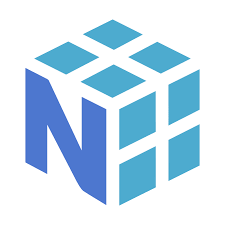

`NumPy` (Numerical Python) es la librería fundamental para computación científica (numérica) con `Python`. Contiene, entre otras cosas:
- un objeto tipo arreglo N-dimensional muy poderoso
- funciones sofisticadas
- funciones de álgebra lineal, transformada de Fourier y números aleatorios.

Por lo anterior, `NumPy` es de amplio uso entre la comunidad científica e ingenieril (por su manejo de cantidades vectoriales). De la misma manera, se usa para guardar datos. Para nuestros propósitos, se puede usar libremente.

**Referencia:**
- http://www.numpy.org/

`NumPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [1]:
# importar la librería numpy
import numpy as np

In [2]:
x = np.array([2, 1])

In [3]:
x

array([2, 1])

In [4]:
x*2

array([4, 2])

In [5]:
2*x

array([4, 2])

In [6]:
x.transpose()

array([2, 1])

In [7]:
x.T

array([2, 1])

### 0.2 `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.sympy.org/static/images/logo.png" width="300px" height="100px" />

`SymPy` (Symbolic Python) es una librería de `Python` para matemáticas simbólicas. Su objetivo es convertirse en un sistema de álgebra computacional con las mejores características, manteniendo el código lo más simple posible para que sea comprensible.

**Referencia:**
- http://www.sympy.org/en/index.html

`SymPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [8]:
# importar la librería sympy
import sympy as sy

$$y=f(x)=x^2$$

In [9]:
sy.init_printing(use_latex='mathjax')

In [10]:
help(sy.init_printing)

Help on function init_printing in module sympy.interactive.printing:

init_printing(pretty_print=True, order=None, use_unicode=None, use_latex=None, wrap_line=None, num_columns=None, no_global=False, ip=None, euler=False, forecolor=None, backcolor='Transparent', fontsize='10pt', latex_mode='plain', print_builtin=True, str_printer=None, pretty_printer=None, latex_printer=None, scale=1.0, **settings)
    Initializes pretty-printer depending on the environment.
    
    Parameters
    
    pretty_print : boolean, default=True
        If True, use pretty_print to stringify or the provided pretty
        printer; if False, use sstrrepr to stringify or the provided string
        printer.
    order : string or None, default='lex'
        There are a few different settings for this parameter:
        lex (default), which is lexographic order;
        grlex, which is graded lexographic order;
        grevlex, which is reversed graded lexographic order;
        old, which is used for compatibil

La funcionalidad de imprimir en formato LaTex que nos da `SymPy` mediante el proyecto `mathjax` hace de `SymPy` una herramienta muy atractiva...

Notar que en `SymPy` y en `NumPy` existen funciones con el mismo nombre, pero reciben tipos de datos diferentes...

In [11]:
sy.sin(3.1416)

-7.34641020664359e-6

In [12]:
np.sin(3.1416)

-7.346410206643587e-06

In [13]:
# from sympy import *
# from numpy import *
# Esta práctica no es para nada recomendable.

### 0.3 `PyPlot` de `matplotlib`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://matplotlib.org/_static/logo2.svg" width="300px" height="100px" />

El módulo `PyPlot` de la librería `matplotlib` contiene funciones que nos permite generar una gran cantidad de gráficas rápidamente. Las funciones de este módulo están escritas con el mismo nombre que las funciones para graficar en `Matlab`.

**Referencia:**
- https://matplotlib.org/api/pyplot_summary.html

In [14]:
# importar matplotlib.pyplot
import matplotlib.pyplot as plt
# Lo siguiente es equivalente
# from matplotlib import pyplot as plt
# comando para que las gráficas salgan en la misma ventana
%matplotlib inline

Ya que revisamos todas las librerías que usaremos, empecemos con la clase como tal...

___
Basamos todos los resultados en los siguientes teoremas:

## 1. Teorema de Fermat (análisis)

Si una función $f(x)$ alcanza un máximo o mínimo local en $x=c$, y si la derivada $f'(c)$ existe en el punto $c$, entonces $f'(c) = 0$.

### Ejemplo

Sabemos que la función $f(x)=x^2$ tiene un mínimo global en $x=0$, pues

$$f(x)=x^2\geq0,\qquad\text{y}\qquad f(x)=x^2=0 \qquad\text{si y solo si}\qquad x=0.$$

In [15]:
# declarar la variable real x
sy.var('x')

x

In [16]:
# declarar ahora f=x^2 y mostrar
f = x**2

In [17]:
f

 2
x 

In [18]:
# derivar f respecto a x y mostrar
df = sy.diff(f,x)

In [19]:
df

2⋅x

In [20]:
# resolver f'(x)=0 y mostrar soluciones
sol = sy.solve(df,x)

In [21]:
sol

[0]

In [22]:
# Encuentra también soluciones complejas
sol2 = sy.solve(x**3 + 1, x)
sol2

⎡    1   √3⋅ⅈ  1   √3⋅ⅈ⎤
⎢-1, ─ - ────, ─ + ────⎥
⎣    2    2    2    2  ⎦

In [23]:
sol2

⎡    1   √3⋅ⅈ  1   √3⋅ⅈ⎤
⎢-1, ─ - ────, ─ + ────⎥
⎣    2    2    2    2  ⎦

In [24]:
sol3 = sy.solve(x**2+1,x)
sol3

[-ⅈ, ⅈ]

In [25]:
sol3[0]

-ⅈ

In [26]:
sol3[1]

ⅈ

In [27]:
# Puedo resolver ecuaciones que involucren más de una variable
sy.var('y')


y

In [28]:
solxy = sy.solve(x**3 + y, x)

In [29]:
solxy

⎡          3 ____        3 ____    3 ____        3 ____⎤
⎢3 ____    ╲╱ -y    √3⋅ⅈ⋅╲╱ -y     ╲╱ -y    √3⋅ⅈ⋅╲╱ -y ⎥
⎢╲╱ -y , - ────── - ───────────, - ────── + ───────────⎥
⎣            2           2           2           2     ⎦

Veamos la gráfica...

In [30]:
f

 2
x 

In [31]:
# convertir f e una función que se pueda evaluar numéricamente (función lambdify de la librería sympy)
f_num = sy.lambdify(x,f, modules='numpy')

In [32]:
f_num(np.array([2,4,6,10]))

array([  4,  16,  36, 100])

In [33]:
# Coordenadas x (abscisas)
np.linspace(0,3,10)

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

In [34]:
f_num(np.linspace(0,3,10))

array([0.        , 0.11111111, 0.44444444, 1.        , 1.77777778,
       2.77777778, 4.        , 5.44444444, 7.11111111, 9.        ])

In [35]:
x_num = np.linspace(-5,5,10)

In [36]:
y_num=f_num(x_num)
y_num

array([25.        , 15.12345679,  7.71604938,  2.77777778,  0.30864198,
        0.30864198,  2.77777778,  7.71604938, 15.12345679, 25.        ])

In [37]:
f_num(np.array(sol))

array([0], dtype=object)

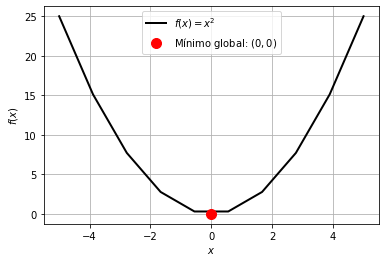

In [38]:
# graficar
plt.figure(figsize=(6,4))

plt.plot(x_num,y_num,'k',lw=2,label='$f(x)=x^2$')

plt.plot(np.array(sol),f_num(np.array(sol)), 'ro', ms=10, label='Mínimo global: $(0,0)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')
plt.grid()


Ver diferencias entre f y f_num

In [41]:
# intentar evaluar f y f_num
f

 2
x 

In [42]:
f_num(12)

144

**Otra manera de hacer lo anterior**

Concepto de función...

In [ ]:
# Concepto de función
# def nombre_de_la_funcion(argumento[s]):
#     --> Operación 1
#     --> Operación 2
#     --> ...
#     --> Operación N
#     return [lo que vaya a devolver]


In [43]:
def h(x):
    return x**2

In [44]:
type(x)

sympy.core.symbol.Symbol

In [46]:
f

 2
x 

In [47]:
f2 = h(x)

In [49]:
h(x)

 2
x 

In [50]:
h(12)

144

In [51]:
h(np.array([12,14,5]))

array([144, 196,  25])

In [53]:
dh = sy.diff(h(x),x)
dh

2⋅x

In [54]:
solucion = sy.solve(dh,x)
solucion

[0]

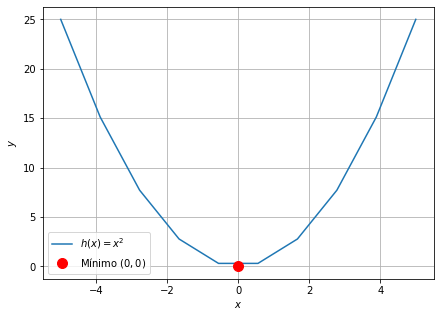

In [55]:
# graficar
# Crear ventana de gráficos y damos medidas a la ventana
plt.figure(figsize=(7,5))
# Sirve para hacer el gráfico y determinar sus características
plt.plot(x_num,h(x_num), label='$h(x)=x^2$')
# Graficar el mínimo (soluciones)
plt.plot(solucion, h(np.array(solucion)), 'ro', ms=10, label='Mínimo $(0,0)$')
# Nombre del eje x en la gráfica
plt.xlabel('$x$')
# Nombre del eje y en la gráfica
plt.ylabel('$y$')
# Sirve para poner las etiquetas en la gráfica (legends)
plt.legend(loc='best')
# Sirve para poner la cuadrícula
plt.grid()

El converso del teorema anterior no es cierto.

### Actividad
Considere $g(x)=x^3$. 
- Usando `sympy`, muestre que $g'(0)=0$.
- Sin embargo, descartar que $x=0$ es un extremo de $g(x)$ viendo su **gráfica**.

In [56]:
# Declarar la variable simbolica x
type(x)

sympy.core.symbol.Symbol

In [57]:
sy.var('x')

x

In [59]:
# Definimos funcion g(x)
def g(x):
    return x**3

In [60]:
g(2)

8

In [61]:
g(x)

 3
x 

In [62]:
# Derivamos g(x)
dg = sy.diff(g(x),x)
dg

   2
3⋅x 

In [63]:
# Puntos criticos (sy.solve(dg,x))
solucion = sy.solve(dg,x)
solucion

[0]

In [67]:
x_num = np.linspace(-10,10,20)
x_num

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

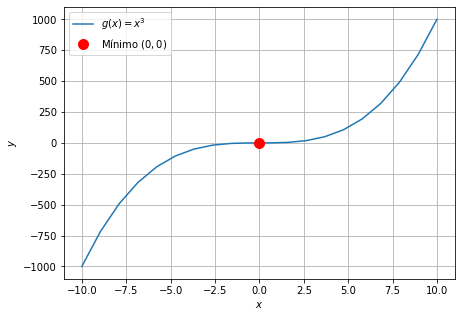

In [66]:
# graficar
# Crear ventana de gráficos y damos medidas a la ventana
plt.figure(figsize=(7,5))
# Sirve para hacer el gráfico y determinar sus características
plt.plot(x_num,g(x_num), label='$g(x)=x^3$')
# Graficar el mínimo (soluciones)
plt.plot(solucion, g(np.array(solucion)), 'ro', ms=10, label='Mínimo $(0,0)$')
# Nombre del eje x en la gráfica
plt.xlabel('$x$')
# Nombre del eje y en la gráfica
plt.ylabel('$y$')
# Sirve para poner las etiquetas en la gráfica (legends)
plt.legend(loc='best')
# Sirve para poner la cuadrícula
plt.grid()


## 2. Criterio de la segunda derivada

Sea $f(x)$ una función tal que $f’(c)=0$ y cuya segunda derivada existe en un intervalo abierto que contiene a $c$.
- Si $f’’(c)>0$, entonces $f(c)$ es un mínimo relativo.
- Si $f’’(c)<0$, entonces $f(c)$ es un máximo relativo.
- Si $f’’(c)=0$, entonces el criterio no decide. 

### Ejemplo

Mostrar, usando `sympy`, que la función $f(x)=x^2$ tiene un mínimo relativo en $x=0$.

Ya vimos que $f'(0)=0$. Notemos que:

In [69]:
f

 2
x 

In [68]:
df

2⋅x

In [73]:
df.subs({x:0})

0

In [76]:
# Sacamos la segunda derivada
d2f = sy.diff(df,x)
d2f

2

In [78]:
# Formas equivalentes de obtener la segunda derivada
d2f = sy.diff(f,x,x)
d2f

2

In [79]:
d2f = sy.diff(f,x,2)
d2f

2

Por tanto, por el criterio de la segunda derivada, $f(0)=0$ es un mínimo relativo (en efecto, el mínimo global).

### Ejemplo
¿Qué pasa con $g(x)=x^3$ al intentar utilizar el criterio de la segunda derivada? (usar `sympy`).

In [80]:
# Definimos la función g(x)=x^3
g(x)

 3
x 

In [81]:
# Sacamos la derivada de la función g respecto a x g'(x)=3x^2
dg = sy.diff(g(x),x)
dg

   2
3⋅x 

In [82]:
# Observamos que g'(0)=0 (es un punto crítico)
dg.subs({x:0})

0

In [83]:
# Obtenemos la segunda derivada de la función g respecto a x g''(x)=6x
d2g = sy.diff(g(x),x,2)
d2g


6⋅x

In [84]:
# Evaluamos g''(0)
d2g.subs({x:0})

0

Como $g''(0)=0$ entonces el criterio de la segunda derivada no concluye.

### Actividad

¿Qué pasa con $h(x)=x^4$ al intentar utilizar el criterio de la segunda derivada?.

In [86]:
def h(x):
    return x**4

In [87]:
h(x)

 4
x 

In [89]:
dh = sy.diff(h(x),x)
dh

   3
4⋅x 

In [90]:
dh.subs({x:0})

0

In [92]:
d2h = sy.diff(h(x),x,2)
d2h

    2
12⋅x 

In [93]:
d2h.subs({x:0})

0

## 3. Método para determinar extremos absolutos de una función continua y=f(x) en [a,b] 

- Determinar todos los valores críticos $c_1, c_2, c_3, \dots, c_n$ en $(a,b)$.
- Evaluar $f$ en todos los valores críticos y en los extremos $x=a$ y $x=b$.
- El más grande y el más pequeño de los valores de la lista $f(a), f(b), f(c_1), f(c_2), \dots, f(c_n)$ son el máximo absoluto y el mínimo absoluto, respectivamente, de f en el intervalo [a,b].

### Ejemplo

Determinar los extremos absolutos de $f(x)=x^2-6x$ en $\left[0,5\right]$.

Obtenemos los puntos críticos de $f$ en $\left[0,5\right]$:

In [94]:
# Definimos f
def f(x):
    return x**2 - 6*x

In [95]:
f(2)

-8

In [96]:
f(x)

 2      
x  - 6⋅x

In [97]:
# Derivamos f
df = sy.diff(f(x),x)
df

2⋅x - 6

In [98]:
# Resolver la ecuación f'(x)=0 para encontrar puntos críticos
p_criticos = sy.solve(df,x)
p_criticos

[3]

Evaluamos $f$ en los extremos y en los puntos críticos:

In [99]:
f(0), f(5), f(p_criticos[0])

(0, -5, -9)

Concluimos que el máximo absoluto de $f$ en $\left[0,5\right]$ es $0$ y se alcanza en $x=0$, y que el mínimo absoluto es $-9$ y se alcanza en $x=3$.

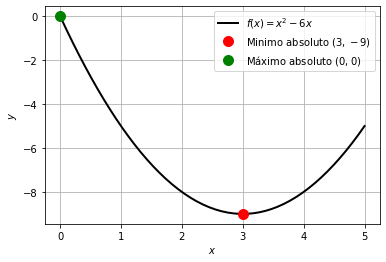

In [100]:
# graficar
plt.figure(figsize=(6,4))

x_num = np.linspace(0,5)
plt.plot(x_num, f(x_num), 'k', lw=2, label='$f(x)=x^2-6x$')
plt.plot(p_criticos[0], f(p_criticos[0]), 'ro', ms=10,
         label=f'Minimo absoluto $({p_criticos[0]}, {f(p_criticos[0])})$')

plt.plot(0, f(0), 'go', ms=10,
         label=f'Máximo absoluto $({0}, {f(0)})$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### Actividad
Determinar los valores extremos absolutos de $h(x)=x^3-3x$ en $\left[-2.2,1.8\right]$, usando `sympy`. Mostrar en una gráfica.

### En varias variables...

El procedimiento es análogo. 

Si una función $f:\mathbb{R}^n\to\mathbb{R}$ alcanza un máximo o mínimo local en $\boldsymbol{x}=\boldsymbol{c}\in\mathbb{R}^n$, y $f$ es diferenciable en el punto $\boldsymbol{x}=\boldsymbol{c}$, entonces $\left.\frac{\partial f}{\partial \boldsymbol{x}}\right|_{\boldsymbol{x}=\boldsymbol{c}}=\boldsymbol{0}$ (todas las derivadas parciales en el punto $\boldsymbol{x}=\boldsymbol{c}$ son cero).

**Criterio de la segunda derivada:** para ver si es máximo o mínimo, se toma la segunda derivada (matriz jacobiana) y se verifica definición negativa o positiva, respectivamente.

Si se restringe a cierta región, hay ciertas técnicas. La más general, pero también la más compleja es la de **multiplicadores de Lagrange**.

**Ejemplo:** hacer a mano a la vez para corroborar...

In [ ]:
# Graficar
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Problema:
Se desea construir una lata cilíndrica de 250 $ml$ ¿Cuál es el radio de la base ($r$) y la altura del cilíndro ($h$) para minimizar la superficie?

1. Identificar qué se quiere minimizar (o maximizar):

    **Solución**
    
    Minimizar la superficie de un cilíndro ($S$).
    
    $$
    S=A_B+A_R,
    $$
    donde $A_B$ es el área de la base y $A_R$ es el área de la zona recta.
    $$
    A_B=\pi r^2,
    $$
    $$
    A_R=h \pi2r.
    $$
    
    Entonces $S=\pi r^2+h\pi2r$.
    
2. Incluir las restricciones:

    **Solución**
    
    El volumen ($V$) debe ser 250 $ml$=250 $cm^3$.
    
    $$
    V=\pi r^2h=250.
    $$
    
    Por lo que $h=\frac{250}{\pi r^2}$. Sustituyendo en $S$
    $$
    S=\pi r^2+\frac{250}{\pi r^2}\pi2r,
    $$
    simplificando, tenemos
    $$
    S=\pi r^2+\frac{500}{r}.
    $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

def S(r):
    return 2*np.pi*r**2+500/r
sym.var('r',real=True)
S(r)

6.28318530717959*r**2 + 500/r

In [2]:
dS=sym.diff(S(r),r)
dS

12.5663706143592*r - 500/r**2

In [3]:
c=sym.solve(dS,r)


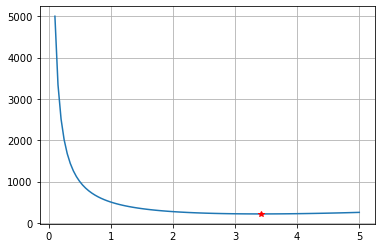

In [4]:
x=np.linspace(0.1,5,100)
y=S(x)
plt.plot(x,y)
plt.plot(c[0],S(c[0]),'*r')
plt.grid()

# Anuncios

## 1. [Curso gratis sugerido](https://www.kaggle.com/learn/python)
